读取当日时间格式n1 2018-02-04
读取当日时间格式n2 20180204
读取前一日时间格式n3 2018-02-03
读取当日时间格式n4 201824
读取当日时间格式n5 2018-02-04T07:03:36.872575
手动设定选股开始时间格式n8 20180202
手动设定选股结束时间格式n9 20180202
手动设定数据更新设定起始时间格式n10 20170101
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 3419.22 3463.16 3388.86 3462.08 20812055100.0
当天涨幅 0.004380646246859632
打印60日均线 3381.247499999997
判断收盘价是否大于60日均线 True
30日最高价 3587.03
最近30日，收盘价 Close 大于60日均线的天数 23
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 3563.64
5日均线上穿10日均线 False


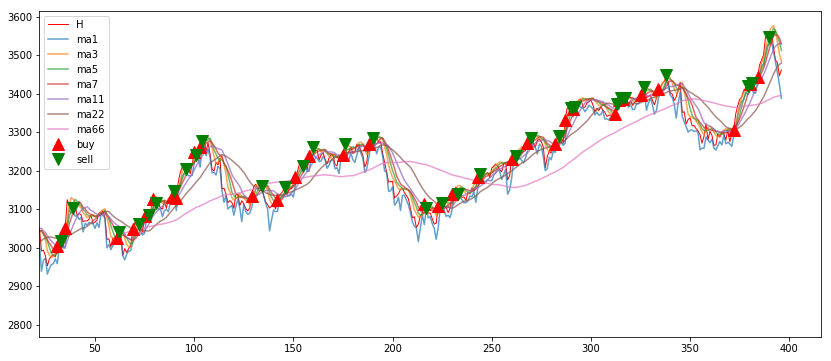

77.80144980757865 81.17679998347786 71.05074945578022


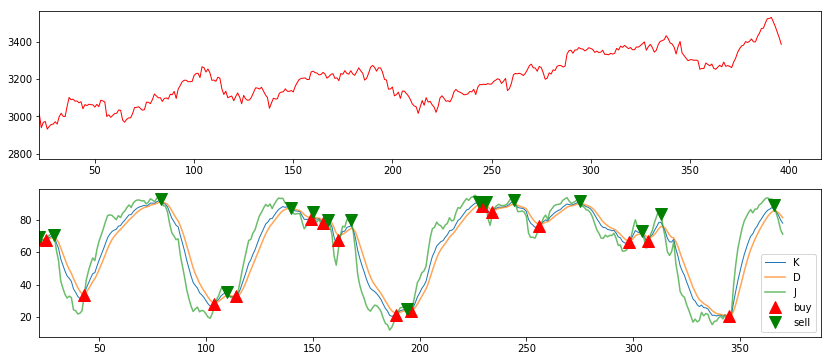

135.5704000000037 124.5776200000029


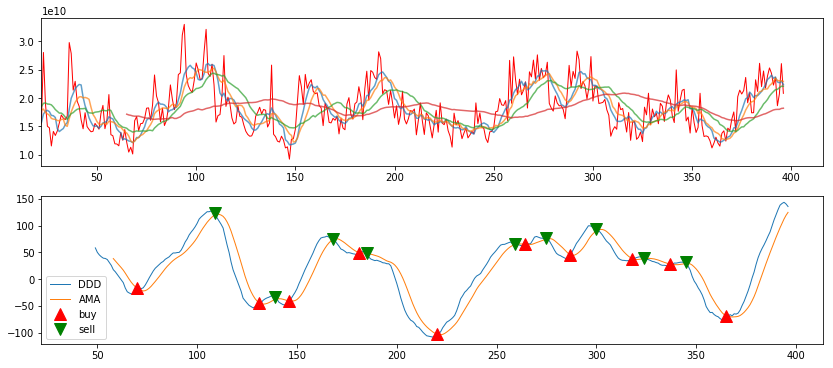

-74.96476964046275 -99.39396130027039 -173.7574668858297


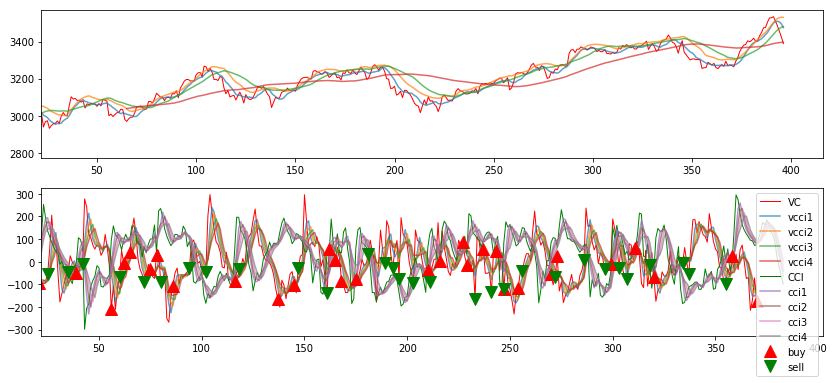

In [4]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
#from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
#from tushare import * #TUSHARE数据连接更新。
#from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#from jaqs import * #QunatOS的jaqs客户端在线。
#from abupy import * #ABUPY本地化，数据在线下载更新，数据在线下载在根目录abu下
#from quantaxis import * #加载QUANTAXIS数据库模块，首先需要开启mongoDB+web服务器，数据更新通过通达信服务器。
#from hikyuu import * #HIKYUU本地化，数据库在根目录的stock。通过通达信导入。

#读取/设定数据库时间区域，当前股票，选股时间段。 
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前一天日期
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180202"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180202"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20170101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
print ("设定股票代码",x1)

#设定数据库连接：RQALPHA/TUSHARE
#from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

#当前股票最新数据显示。
S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

#当前股票价格均线+买卖
ax = plt.subplot()
ma1 = MA(L,1)
ma3 = MA(H,3)
ma5 = MA(H,5)
ma7 = MA(H,7)
ma11 = MA(H,11)
ma22 = MA(H,22)
ma66 = MA(H,66)
buy_signal = CROSS(ma1, ma7)
sell_signal = CROSS(ma7, ma1)
plt.plot(C.series, label="H", linewidth=1,color="red")
plt.plot(ma1.series, label="ma1", alpha=0.7)
plt.plot(ma3.series, label="ma3", alpha=0.7)
plt.plot(ma5.series, label="ma5", alpha=0.7)
plt.plot(ma7.series, label="ma7", alpha=0.7)
plt.plot(ma11.series, label="ma11", alpha=0.7)
plt.plot(ma22.series, label="ma22", alpha=0.7)
plt.plot(ma66.series, label="ma66", alpha=0.7)
ax.set_xlim(22)
plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖
N, M1, M2 = 27, 9, 3
RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
K = EMA(RSV, (M1 * 2 - 1))
D = EMA(K, (M2 * 2 - 1))
J = K * 3 - D * 2
print(K, D, J)
f, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(L.series, label="L", linewidth=1,color="red")
#ax1.plot(MA(L, 7).series, label="ma7", alpha=0.7)
#ax1.plot(MA(H, 11).series, label="ma11", alpha=0.7)
#ax1.plot(MA(H, 22).series, label="ma22", alpha=0.7)
#ax1.plot(MA(H, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(K.series, label="K", linewidth=1)
ax2.plot(D.series, label="D", alpha=0.7)
ax2.plot(J.series, label="J", alpha=0.7)
ax2.set_xlim(22)
buy_signal = CROSS(J, K)
sell_signal = CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()


#当前股票成交量均线+DMA指标+买卖
#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
M1 = 10
M2 = 50
M3 = 10
DDD = MA(CLOSE, M1) - MA(CLOSE, M2)
AMA = MA(DDD, M3)
print(DDD, AMA)
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(V.series, label="V", linewidth=1,color="red")
ax1.plot(MA(V, 7).series, label="ma7", alpha=0.7)
ax1.plot(MA(V, 11).series, label="ma11", alpha=0.7)
ax1.plot(MA(V, 22).series, label="ma22", alpha=0.7)
ax1.plot(MA(V, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(DDD.series, label="DDD", linewidth=1)
ax2.plot(AMA.series, label="AMA", linewidth=1)
ax2.set_xlim(22)
buy_signal = CROSS(DDD, AMA)
sell_signal = CROSS(AMA, DDD)
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#CCI指标 方差函数模块
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
M=14
TYP = (H+L+C)/3
CCI = (TYP-MA(TYP,M))/(0.015*AVEDEV(TYP,M))
VCCI = (V-MA(V,M))/(0.015*AVEDEV(V,M))
VC = ((CCI+VCCI)-MA((CCI+VCCI),M))/(0.015*AVEDEV((CCI+VCCI),M))
print (VCCI,CCI,VC)
f, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(L.series, label="L", linewidth=1,color="red")
ax1.plot(MA(L, 7).series, label="ma7", alpha=0.7)
ax1.plot(MA(H, 11).series, label="ma11", alpha=0.7)
ax1.plot(MA(H, 22).series, label="ma22", alpha=0.7)
ax1.plot(MA(H, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(VC.series, label="VC",linewidth=1,color="red")
ax2.plot(MA(VC,3).series, label="vcci1", alpha=0.7)
ax2.plot(MA(VC, 4).series, label="vcci2", alpha=0.7)
ax2.plot(MA(VC, 5).series, label="vcci3", alpha=0.7)
ax2.plot(MA(VC, 6).series, label="vcci4", alpha=0.7)
ax2.plot(CCI.series, label="CCI",linewidth=1, color="green")
ax2.plot(MA(CCI, 3).series, label="cci1", alpha=0.7)
ax2.plot(MA(CCI, 4).series, label="cci2", alpha=0.7)
ax2.plot(MA(CCI, 5).series, label="cci3", alpha=0.7)
ax2.plot(MA(CCI, 6).series, label="cci4", alpha=0.7)
ax2.set_xlim(22)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], VC.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VC.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()



In [5]:
# 选股CCI  OK!!!
select(
    lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))

,101 or -101),start_date=(n8),end_date=(n9),)

lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))

,101 or -101),start_date=(n8),end_date=(n9),)
[20180202]
20180202 000048.XSHE 康达尔
20180202 000898.XSHE 鞍钢股份
20180202 000976.XSHE 华铁股份
20180202 000989.XSHE 九芝堂
20180202 002128.XSHE 露天煤业
20180202 002258.XSHE 利尔化学
20180202 002319.XSHE 乐通股份
20180202 002359.XSHE 北讯集团
20180202 002601.XSHE 龙蟒佰利
20180202 002699.XSHE 美盛文化
20180202 002847.XSHE 盐津铺子
No data for 002926.XSHE
20180202 300068.XSHE 南都电源
20180202 300166.XSHE 东方国信
20180202 300343.XSHE 联创互联
20180202 300571.XSHE 平治信息
20180202 300582.XSHE 英飞特
20180202 600028.XSHG 中国石化
20180202 600048.XSHG 保利地产
20180202 600282.XSHG 南钢股份

In [6]:
# KDJ选股 ok！！！
select(
    lambda : CROSS((EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2, (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))))

,
    start_date=(n8),
	end_date=(n9),
)

lambda : CROSS((EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2, (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))))
[20180202]
20180202 000681.XSHE 视觉中国
20180202 002582.XSHE 好想你
20180202 300277.XSHE 海联讯
20180202 300413.XSHE 快乐购
20180202 300550.XSHE 和仁科技
20180202 600636.XSHG *ST爱富
20180202 600640.XSHG 号百控股
20180202 600857.XSHG 宁波中百
20180202 601012.XSHG 隆基股份
20180202 601628.XSHG 中国人寿



In [190]:
#新指标


#def CCC(M1 =[1&2&3&5&7&9&11&13&15&17&19]):
#def CCC(M1 =[1,2,3,5,7,9,11,13,15,17,19]):
#def CCC(M1 =len([1*2*3*5*7*9*11*13*15*17*19])):
#def CCC(M1 = (list(range(1, 22)))) :
#def CCC(M1=[x * x for x in range(1, 11)]):
def CCI(M1=14):    
    CCC = (((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1)
      )/3.14159265)-MA(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1)
        )/3.14159265),M1))/(0.618*AVEDEV(((REF(HIGH,M1) + REF(LOW,M1
         ) + REF(CLOSE,M1))/3.14159265),M1))
    return CCC
    
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
    
def AVE_DEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    AVE = ABS(value-mean)
    for i in range(1,N):
        AVE += ABS(REF(value,i)-mean)

    return AVE/N


select(
    lambda :
    (((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265)-MA(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))
    /3.14159265),14))/(0.618*AVEDEV(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265),14)) > 100 ,
    
    start_date=(n8),
    end_date=(n9),
)



lambda :
[20180202]
No data for 002926.XSHE


KeyboardInterrupt: 

In [ ]:
from pandas import Series, DataFrame
import pandas as pd

def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    return sum_/N
def AVE_DEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    AVE = ABS(value-mean)
    for i in range(1,N):
        AVE += ABS(REF(value,i)-mean)
    return AVE/N

M=2

#M1 =[1&2&3&5&7&9&11&13&15&17&19]
#M1 =[1,2,3,5,7,9,11,13,15,17,19]
#M1 =len([1*2*3*5*7*9*11*13*15*17*19])
#M1 = list(range(1, 11))
#M1 = [x * x for x in range(1, 11)]
#dM1=14
TYPI = (HIGH+LOW+CLOSE)/3
CCI = (TYPI-MA(TYPI,M))/(0.015*AVEDEV(TYPI,M))

TYP = (REF(HIGH,M)+REF(LOW,M)+REF(CLOSE,M)+REF(VOL,M))/3.14159265  
CCC = (TYP-MA(TYP,M))/(0.618*AVEDEV(TYP,M))
TYP1 = (REF(V,M)+REF(V,M)+REF(V,M)+REF(V,M))/3.14159265  
DDD = (CCC*CCC*CCC)/CCI
#CCC = (((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265)-MA(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265),M1))/(0.618*AVEDEV(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265),M1))
#X = TYP-MA((V*L)/(0.015*AVEDEV((X*L),M))
print (CCI,CCC,DDD,X)
f, (ax1,ax2) = plt.subplots(2,1)
#ax = plt.subplot()
#ax2.plot(H.series, label="H",linewidth=1)
#ax1.plot(X.series, label="X",linewidth=1)
#ax2.plot(CCC.series, label="CCC",linewidth=1)
#ax2.plot(DDD.series, label="DDD",linewidth=1)
plt.legend(loc="best")
plt.show()

In [15]:
#CCI 指标

def CCI(M1=14):
    TYP = (HIGH+LOW+CLOSE)/3
    CCI = (TYP-MA(TYP,M1))/(0.015*AVEDEV(TYP,M1))
    return CCI
    
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
'''	
def AVEDEV(value,N):
	mean = value/N
	for i in range(1,N):
		mean += REF(value,i)/N
	AVE = ABS(value-mean)
	for i in range(1,N):
	    AVE += ABS(REF(value,i)-mean)
	
	return AVE/N
'''

select(
    lambda : (((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265)-MA(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265),14))/(0.618*AVEDEV(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265),14)) > 100,
    start_date=(n8),
	end_date=(n9),
)




lambda : (((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265)-MA(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265),14))/(0.618*AVEDEV(((REF(HIGH,14) + REF(LOW,14) + REF(CLOSE,14))/3.14159265),14)) > 100,
[20180202]



In [ ]:
'''
    TYP = ((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265)    
    CCC1 = (TYP-MA(TYP,1))/(0.618*avedev(TYP,1))
    CCC2 = (TYP-MA(TYP,2))/(0.618*AVEDEV(TYP,2))
    CCC3 = (TYP-MA(TYP,3))/(0.618*ABS(TYP,3))
    CCC4 = (TYP-MA(TYP,5))/(0.618*ABS(TYP,5))
    CCC5 = (TYP-MA(TYP,7))/(0.618*ABS(TYP,7))
    CCC6 = (TYP-MA(TYP,9))/(0.618*ABS(TYP,9))
    CCC7 = (TYP-MA(TYP,11))/(0.618*ABS(TYP,11))
    CCC8 = (TYP-MA(TYP,13))/(0.618*ABS(TYP,13))
    CCC9 = (TYP-MA(TYP,15))/(0.618*ABS(TYP,15))
    CCC10 = (TYP-MA(TYP,17))/(0.618*ABS(TYP,17))
    CCC11 = (TYP-MA(TYP,19))/(0.618*ABS(TYP,19))
    MAMTM = (MA((MA(CLOSE-REF(CLOSE,12),6)),6))

    #cccx = range(ccc2,0,2) & range(ccc3,0,3) & CROSS(ccc5,0) & CROSS(ccc6,0) & CROSS(ccc7,0) & CROSS(ccc8,0) & CROSS(ccc9,0) & CROSS(ccc10,0) & CROSS(ccc11,0) 
    #cccB = range(ccc2,0,2) & range(ccc3,0,3) & CROSS(ccc5,-1) & CROSS(ccc6,-1) & CROSS(ccc7,-1) & CROSS(ccc8,-1) & CROSS(ccc9,-1) & CROSS(ccc10,-1) & CROSS(ccc11,-1))) & CROSS((ATAN((REF(MA(CLOSE,12),1)/REF(MA(CLOSE,12),2)-1)*100)*75.3),35) & (REF(VOL,1)/REF(MA(VOL,3),2))>1.618 & REF(CLOSE,2)/REF(OPEN,1)<1.0618 & REF(CLOSE,2)/REF(CLOSE,1)<1.099 & OPEN/REF(CLOSE,1)<1.0618
''' 


select(
    lambda : CCC / CCI[1] - 1 >= 0.0995,
    start_date=(n8),
	end_date=(n9),
)



In [8]:
# 选出涨停股
select(
    lambda : C / C[1] - 1 >= 0.0995,
    start_date=(n8),
	end_date=(n9),
)

# 选出最近30天K线实体最高价最低价差7%以内，最近100天K线实体最高价最低价差25%以内，
# 最近10天，收盘价大于60日均线的天数大于3天
select(
    lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
    start_date=(n8),
	end_date=(n9),
)

# 选出最近3天每天的成交量小于20日成交量均线，最近3天最低价低于20日均线，最高价高于20日均线
# 自定义选股回调函数
def callback(date, order_book_id, symbol):
    print("Cool, 在", date, "选出", order_book_id, symbol)

    
select(
    lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY(H > MA(C, 20), 3)),
    start_date=(n8),
	end_date=(n9),
    callback=callback,
)

lambda : C / C[1] - 1 >= 0.0995,
[20180202]
20180202 000672.XSHE 上峰水泥
20180202 002128.XSHE 露天煤业
20180202 300058.XSHE 蓝色光标
20180202 300277.XSHE 海联讯
20180202 300364.XSHE 中文在线
20180202 300370.XSHE 安控科技
20180202 300550.XSHE 和仁科技
20180202 300738.XSHE 奥飞数据
20180202 300739.XSHE 明阳电路
20180202 600362.XSHG 江西铜业
20180202 600497.XSHG 驰宏锌锗
20180202 600583.XSHG 海油工程
20180202 600740.XSHG 山西焦化
20180202 600985.XSHG 雷鸣科化
20180202 601313.XSHG 江南嘉捷
20180202 601699.XSHG 潞安环能
20180202 601838.XSHG 成都银行
20180202 603009.XSHG 北特科技
20180202 603056.XSHG 德邦股份
20180202 603117.XSHG 万林股份
20180202 603356.XSHG 华菱精工
20180202 603499.XSHG 翔港科技
20180202 603506.XSHG 南都物业

lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
[20180202]
20180202 600054.XSHG 黄山旅游
20180202 600368.XSHG 五洲交通
20180202 600785.XSHG 新华百货

lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY

In [9]:
#N, M1, M2 = 27, 9, 3
#RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
#K = EMA(RSV, (M1 * 2 - 1))
#D = EMA(K, (M2 * 2 - 1))
#J = K * 3 - D * 2

RSV = ((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100)
K = (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)))
D = (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1)))
J = (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2

print(RSV,K, D, J)

kdj = CROSS((EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2, (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))))

print (kdj)


11.45833333333332 39.42231508652973 31.623988707731815 55.01896784412556
False


In [9]:
M=14
TYP = ((H+L+C)/3)
CCI = ((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))
VCCI = ((V-MA(V,14))/(0.015*AVEDEV(V,14)))
VC = ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))


BBB= CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))

,101 or -101)
print (BBB)



False


In [3]:
select(
    lambda : C  >= 0,
    start_date=(n8),
	end_date=(n9),
)

lambda : C  >= 0,
[20180202]
20180202 000001.XSHE 平安银行
20180202 000002.XSHE 万科A
20180202 000004.XSHE 国农科技
20180202 000005.XSHE 世纪星源
20180202 000008.XSHE 神州高铁
20180202 000009.XSHE 中国宝安
20180202 000010.XSHE 美丽生态
20180202 000011.XSHE 深物业A
20180202 000012.XSHE 南玻A
20180202 000014.XSHE 沙河股份
20180202 000016.XSHE 深康佳A
20180202 000017.XSHE 深中华A
20180202 000020.XSHE 深华发A
20180202 000021.XSHE 深科技
20180202 000023.XSHE 深天地A
20180202 000025.XSHE 特力A
20180202 000026.XSHE 飞亚达A
20180202 000027.XSHE 深圳能源
20180202 000028.XSHE 国药一致
20180202 000030.XSHE 富奥股份
20180202 000032.XSHE 深桑达A
20180202 000036.XSHE 华联控股
20180202 000037.XSHE 深南电A
20180202 000038.XSHE 深大通
20180202 000039.XSHE 中集集团
20180202 000040.XSHE 东旭蓝天
20180202 000042.XSHE 中洲控股
20180202 000043.XSHE 中航地产
20180202 000045.XSHE 深纺织A
20180202 000048.XSHE 康达尔
20180202 000049.XSHE 德赛电池
20180202 000050.XSHE 深天马A
20180202 000055.XSHE 方大集团
20180202 000058.XSHE 深赛格
20180202 000059.XSHE 华锦股份
20180202 000060.XSHE 中金岭南
20180202 000061.XSHE 农产品
20180202 000062.X

20180202 002242.XSHE 九阳股份
20180202 002243.XSHE 通产丽星
20180202 002244.XSHE 滨江集团
20180202 002245.XSHE 澳洋顺昌
20180202 002246.XSHE 北化股份
20180202 002247.XSHE 帝龙文化
20180202 002248.XSHE *ST东数
20180202 002249.XSHE 大洋电机
20180202 002250.XSHE 联化科技
20180202 002252.XSHE 上海莱士
20180202 002253.XSHE 川大智胜
20180202 002254.XSHE 泰和新材
20180202 002255.XSHE 海陆重工
20180202 002258.XSHE 利尔化学
20180202 002261.XSHE 拓维信息
20180202 002262.XSHE 恩华药业
20180202 002264.XSHE 新华都
20180202 002265.XSHE 西仪股份
20180202 002266.XSHE 浙富控股
20180202 002267.XSHE 陕天然气
20180202 002268.XSHE 卫士通
20180202 002269.XSHE 美邦服饰
20180202 002270.XSHE 华明装备
20180202 002271.XSHE 东方雨虹
20180202 002272.XSHE 川润股份
20180202 002273.XSHE 水晶光电
20180202 002274.XSHE 华昌化工
20180202 002275.XSHE 桂林三金
20180202 002276.XSHE 万马股份
20180202 002277.XSHE 友阿股份
20180202 002279.XSHE 久其软件
20180202 002280.XSHE 联络互动
20180202 002281.XSHE 光迅科技
20180202 002282.XSHE 博深工具
20180202 002283.XSHE 天润曲轴
20180202 002284.XSHE 亚太股份
20180202 002285.XSHE 世联行
20180202 002286.XSHE 保龄宝
20180202 002287

20180202 300030.XSHE 阳普医疗
20180202 300031.XSHE 宝通科技
20180202 300033.XSHE 同花顺
20180202 300034.XSHE 钢研高纳
20180202 300035.XSHE 中科电气
20180202 300036.XSHE 超图软件
20180202 300037.XSHE 新宙邦
20180202 300039.XSHE 上海凯宝
20180202 300040.XSHE 九洲电气
20180202 300043.XSHE 星辉娱乐
20180202 300044.XSHE 赛为智能
20180202 300045.XSHE 华力创通
20180202 300046.XSHE 台基股份
20180202 300047.XSHE 天源迪科
20180202 300048.XSHE 合康新能
20180202 300050.XSHE 世纪鼎利
20180202 300051.XSHE 三五互联
20180202 300052.XSHE 中青宝
20180202 300053.XSHE 欧比特
20180202 300054.XSHE 鼎龙股份
20180202 300055.XSHE 万邦达
20180202 300056.XSHE 三维丝
20180202 300057.XSHE 万顺股份
20180202 300058.XSHE 蓝色光标
20180202 300059.XSHE 东方财富
20180202 300061.XSHE 康旗股份
20180202 300062.XSHE 中能电气
20180202 300063.XSHE 天龙集团
20180202 300065.XSHE 海兰信
20180202 300066.XSHE 三川智慧
20180202 300068.XSHE 南都电源
20180202 300069.XSHE 金利华电
20180202 300070.XSHE 碧水源
20180202 300072.XSHE 三聚环保
20180202 300073.XSHE 当升科技
20180202 300074.XSHE 华平股份
20180202 300075.XSHE 数字政通
20180202 300076.XSHE GQY视讯
20180202 300077.XSH

20180202 600006.XSHG 东风汽车
20180202 600007.XSHG 中国国贸
20180202 600008.XSHG 首创股份
20180202 600009.XSHG 上海机场
20180202 600010.XSHG 包钢股份
20180202 600011.XSHG 华能国际
20180202 600012.XSHG 皖通高速
20180202 600015.XSHG 华夏银行
20180202 600016.XSHG 民生银行
20180202 600017.XSHG 日照港
20180202 600018.XSHG 上港集团
20180202 600019.XSHG 宝钢股份
20180202 600020.XSHG 中原高速
20180202 600021.XSHG 上海电力
20180202 600022.XSHG 山东钢铁
20180202 600023.XSHG 浙能电力
20180202 600025.XSHG 华能水电
20180202 600026.XSHG 中远海能
20180202 600027.XSHG 华电国际
20180202 600028.XSHG 中国石化
20180202 600029.XSHG 南方航空
20180202 600030.XSHG 中信证券
20180202 600031.XSHG 三一重工
20180202 600033.XSHG 福建高速
20180202 600035.XSHG 楚天高速
20180202 600036.XSHG 招商银行
20180202 600037.XSHG 歌华有线
20180202 600038.XSHG 中直股份
20180202 600039.XSHG 四川路桥
20180202 600048.XSHG 保利地产
20180202 600050.XSHG 中国联通
20180202 600052.XSHG 浙江广厦
20180202 600053.XSHG 九鼎投资
20180202 600054.XSHG 黄山旅游
20180202 600055.XSHG 万东医疗
20180202 600056.XSHG 中国医药
20180202 600057.XSHG 象屿股份
20180202 600058.XSHG 五矿发展
20180202 6000

20180202 600802.XSHG 福建水泥
20180202 600804.XSHG 鹏博士
20180202 600805.XSHG 悦达投资
20180202 600808.XSHG 马钢股份
20180202 600810.XSHG 神马股份
20180202 600811.XSHG 东方集团
20180202 600812.XSHG 华北制药
20180202 600814.XSHG 杭州解百
20180202 600815.XSHG *ST厦工
20180202 600816.XSHG 安信信托
20180202 600817.XSHG *ST宏盛
20180202 600819.XSHG 耀皮玻璃
20180202 600820.XSHG 隧道股份
20180202 600821.XSHG 津劝业
20180202 600822.XSHG 上海物贸
20180202 600823.XSHG 世茂股份
20180202 600824.XSHG 益民集团
20180202 600825.XSHG 新华传媒
20180202 600826.XSHG 兰生股份
20180202 600827.XSHG 百联股份
20180202 600828.XSHG 茂业商业
20180202 600830.XSHG 香溢融通
20180202 600831.XSHG 广电网络
20180202 600833.XSHG 第一医药
20180202 600834.XSHG 申通地铁
20180202 600835.XSHG 上海机电
20180202 600836.XSHG 界龙实业
20180202 600837.XSHG 海通证券
20180202 600838.XSHG 上海九百
20180202 600839.XSHG 四川长虹
20180202 600841.XSHG 上柴股份
20180202 600843.XSHG 上工申贝
20180202 600844.XSHG *ST丹科
20180202 600845.XSHG 宝信软件
20180202 600846.XSHG 同济科技
20180202 600847.XSHG *ST万里
20180202 600848.XSHG 上海临港
20180202 600850.XSHG 华东电脑
20180202 6

20180202 603882.XSHG 金域医学
20180202 603883.XSHG 老百姓
20180202 603885.XSHG 吉祥航空
20180202 603886.XSHG 元祖股份
20180202 603888.XSHG 新华网
20180202 603889.XSHG 新澳股份
20180202 603890.XSHG 春秋电子
20180202 603895.XSHG 天永智能
20180202 603896.XSHG 寿仙谷
20180202 603898.XSHG 好莱客
20180202 603899.XSHG 晨光文具
20180202 603900.XSHG 莱绅通灵
20180202 603901.XSHG 永创智能
20180202 603903.XSHG 中持股份
20180202 603906.XSHG 龙蟠科技
20180202 603908.XSHG 牧高笛
20180202 603909.XSHG 合诚股份
20180202 603912.XSHG 佳力图
20180202 603916.XSHG 苏博特
20180202 603917.XSHG 合力科技
20180202 603918.XSHG 金桥信息
20180202 603919.XSHG 金徽酒
20180202 603920.XSHG 世运电路
20180202 603922.XSHG 金鸿顺
20180202 603926.XSHG 铁流股份
20180202 603928.XSHG 兴业股份
20180202 603929.XSHG 亚翔集成
20180202 603933.XSHG 睿能科技
20180202 603936.XSHG 博敏电子
20180202 603937.XSHG 丽岛新材
20180202 603938.XSHG 三孚股份
20180202 603939.XSHG 益丰药房
20180202 603955.XSHG 大千生态
20180202 603958.XSHG 哈森股份
20180202 603959.XSHG 百利科技
20180202 603960.XSHG 克来机电
20180202 603963.XSHG 大理药业
20180202 603966.XSHG 法兰泰克
20180202 603968.XSHG 